# Titanic Exercise

#### Importing modules and data

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_full_data = pd.read_excel("C:/Users/jony0/Downloads/CV_training/CV_training/basic/python/titanic.xls")
titanic_full_data.index.rename("Passenger ID")
titanic_full_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN



#### First, let's show the age distribution:

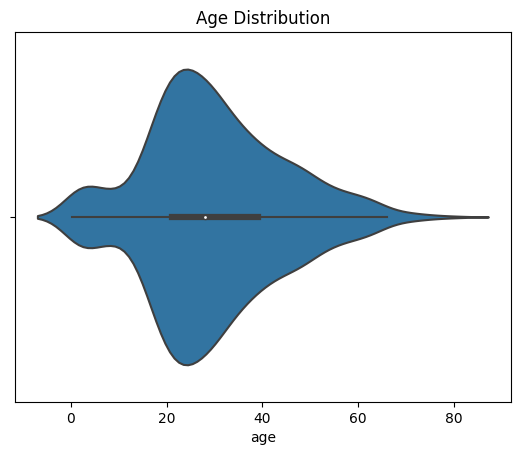

In [ ]:
sns.violinplot(data = titanic_full_data, x="age", scale="width").set(title="Age Distribution");


#### We can also look at this information using a histogram:

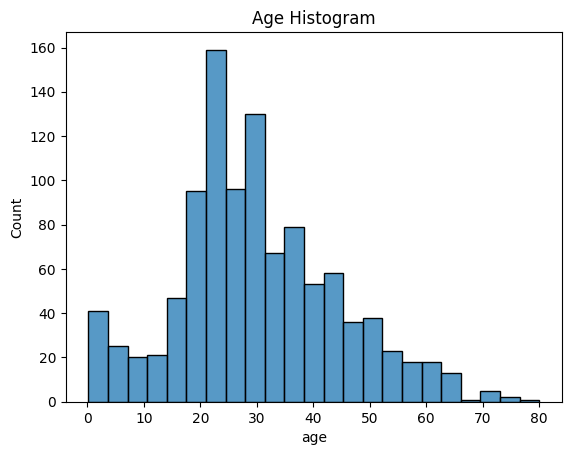

In [ ]:
sns.histplot(data = titanic_full_data, x = "age").set(title = "Age Histogram");

#### All in all, we can see that the majority of the population is adult, and is mostly young (the largest age groups is 18-35 approx.)

#### Another interesting aspect is the age distribution according to sex.

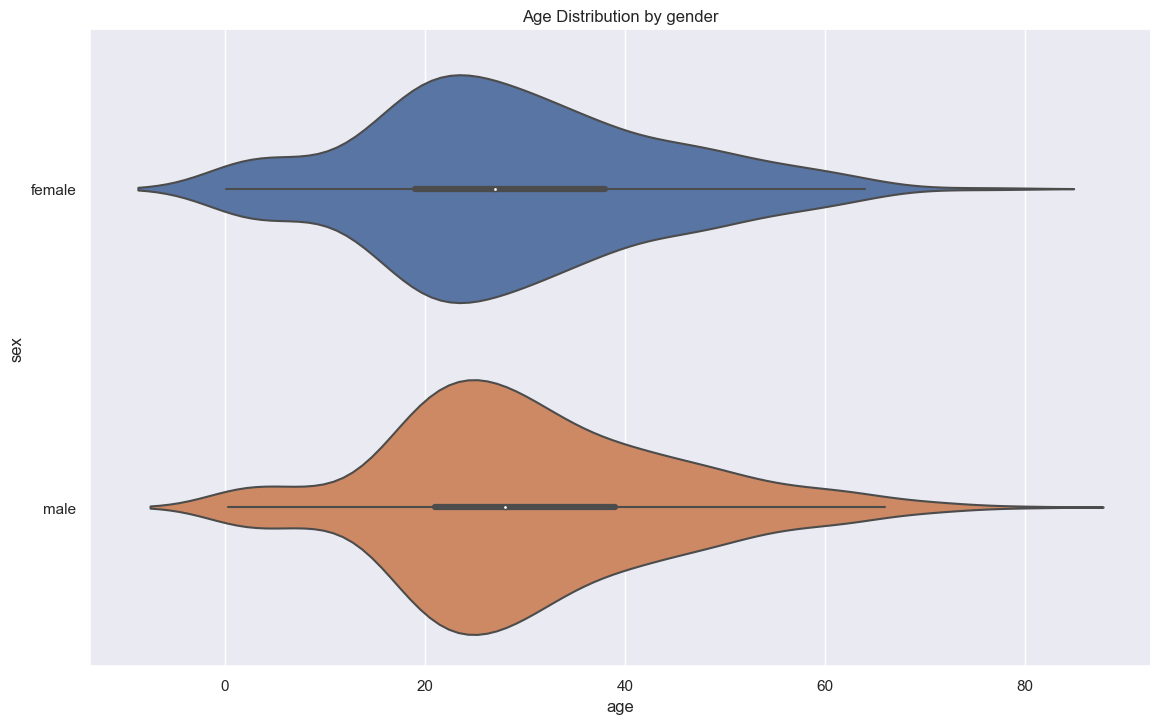

In [59]:
sns.violinplot(data = titanic_full_data, x="age", y = "sex", split=True).set(title="Age Distribution by gender");

#### We can see that the distribution of age is almost identical between males and females.

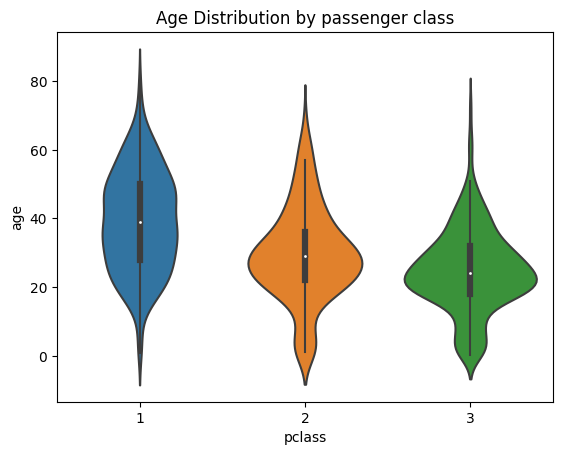

In [ ]:
sns.violinplot(data = titanic_full_data, y="age", x="pclass").set(title="Age Distribution by passenger class");

##### We can see a certain difference in the age distribution between different passenger classes.
##### Passenger class 1, which is the more expensive class has a lot less young children, it contains mostly working-age adults, and is almost evenly distributed from ages 20-50.
##### Passenger class 2 and 3, behave similarly, they have a significant majority (more prominent for class 3) of young adults and children, something that can probably be explained by large immigration to the us, meaning that the trip on the Titanic, is less leisurely and more practical for them.


### In conclusion, we can see that age isn't distributed evenly, the population consits of a plurality of young adults, and older people are mostly concentrated in the more wealthy parts of the ship. 

#### Now we can touch upon the subject of family, we'll look into the structure of families on the Titanic.

In [ ]:
titanic_family_size_data = titanic_full_data.copy()
titanic_family_size_data["family_size"] = titanic_family_size_data.sibsp + titanic_family_size_data.parch
titanic_family_size_data["family_name"] = titanic_family_size_data["name"].str.split(pat=",").str[0]
titanic_family_size_data["family_size"] += 1
titanic_family_size_data = titanic_family_size_data.groupby(["family_name", "family_size", "pclass"]).sum()
titanic_family_size_data = titanic_family_size_data.reset_index()

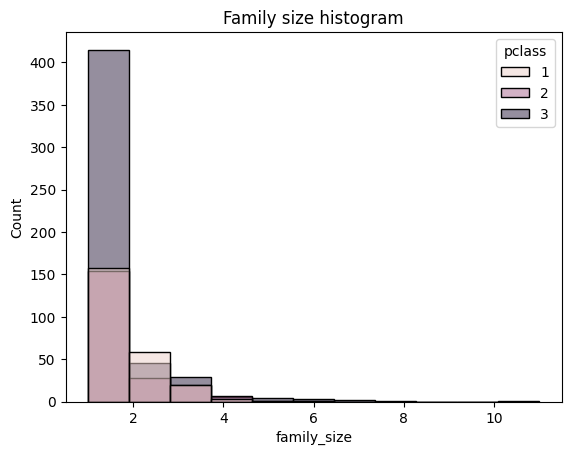

In [ ]:
sns.histplot(data = titanic_family_size_data, x = "family_size", hue = "pclass").set(title = "Family size histogram");

##### We can see several interesting conclusions from the following graph:
##### 1. Most travelers on the Titanic were single, and without a family, they were probably headed to the US to work.
##### 2. There was a small amount of large families.
##### 3. Passenger class 1 consisted of mostly married couples without kids (and almost no lone travelers), class 2 was varied, class 3 consisted of mostly lone travelers.

In [ ]:
titanic_family_size_data
titanic_family_size_data["deceased"] = titanic_family_size_data.family_size - titanic_family_size_data.survived

### Now we can look at the largest families on deck:

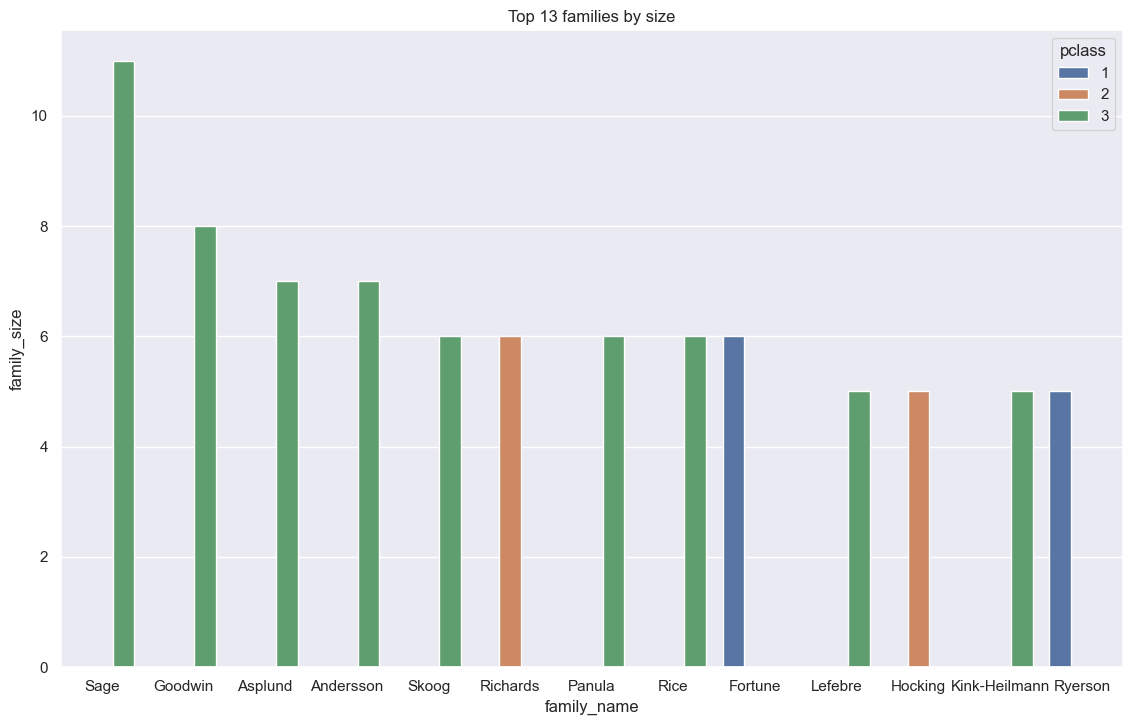

In [ ]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
titanic_family_size_data.sort_values("family_size", ascending = False, inplace = True)
sns.barplot(data = titanic_family_size_data.head(13), y = "family_size", x = "family_name", hue = "pclass").set(title = "Top 13 families by size");

##### Although class 2 has been the main location of families on board, the largest families on the Titanic actually belonged to class 3.
##### This can be explained by the fact that usually large families belong to the lower class (as the middle class consits of mostly small families), and thus even though not many families went to the lower class, the families that did go, were often larger.

In [ ]:
titanic_family_size_data

,family_name,family_size,pclass,survived,age,sibsp,parch,fare,body,deceased
765,Sage,11,3,0,14.5,74,36,765.0500,67.0,11
323,Goodwin,8,3,0,144.0,32,24,375.2000,0.0,8
37,Asplund,7,3,3,113.0,22,20,219.7125,142.0,4
23,Andersson,7,3,1,165.0,30,24,234.6250,0.0,6
804,Skoog,6,3,0,110.0,14,16,167.4000,0.0,6
...,...,...,...,...,...,...,...,...,...,...
370,Hellstrom,1,3,1,22.0,0,0,8.9625,0.0,0
371,Hendekovic,1,3,0,28.0,0,0,7.8958,306.0,1
372,Henriksson,1,3,0,28.0,0,0,7.7750,0.0,1
373,Henry,1,3,0,0.0,0,0,7.7500,0.0,1


#### Now we wish to examin which families were hit with the most deaths.

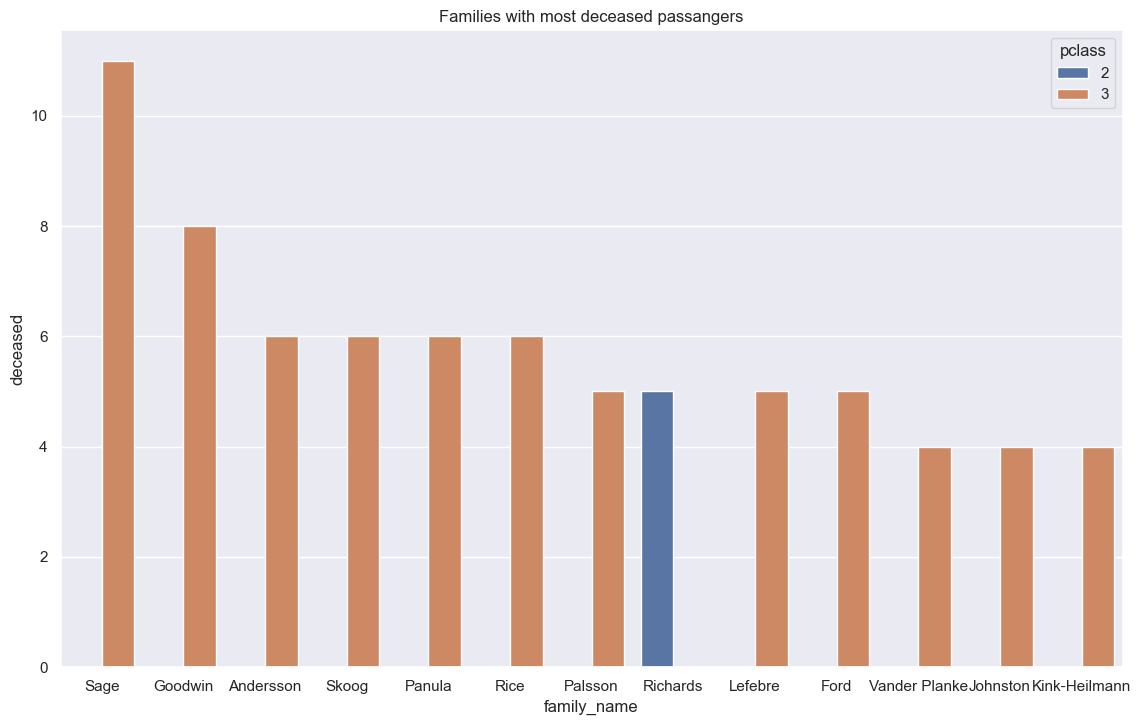

In [ ]:
titanic_family_size_data.sort_values("deceased", ascending = False, inplace = True)
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(data = titanic_family_size_data.head(13), y = "deceased", x = "family_name", hue = "pclass").set(title = "Families with most deceased passangers");

In [55]:
def find_parent(index):
    titanic_find_parent_data = titanic_full_data.copy()
    titanic_find_parent_data["family_name"] = titanic_find_parent_data["name"].str.split(pat=",").str[0]
    titanic_find_parent_data["family_size"] = titanic_find_parent_data.sibsp + titanic_family_size_data.parch
    family_name = titanic_find_parent_data["family_name"][index]
    family_size = titanic_find_parent_data["family_size"][index]
    home_dest = titanic_find_parent_data["home.dest"][index]
    titanic_find_parent_data = titanic_find_parent_data[titanic_find_parent_data["family_name"] == family_name]
    titanic_find_parent_data = titanic_find_parent_data[titanic_find_parent_data["family_size"] == family_size]
    titanic_find_parent_data = titanic_find_parent_data[titanic_find_parent_data["age"] >= 18]
    titanic_find_parent_data = titanic_find_parent_data[titanic_find_parent_data["home.dest"] == home_dest]
    parent_indices = []
    for index, row in titanic_find_parent_data.iterrows():
        if row["survived"] == 0:
            parent_indices.append(index)
    
    return parent_indices



titanic_surviving_children = titanic_full_data[titanic_full_data.age < 18]
titanic_surviving_children = titanic_surviving_children[titanic_surviving_children.survived == 1]
titanic_surviving_children_deceased_parents = []
for index, _ in titanic_surviving_children.iterrows():
    titanic_surviving_children_deceased_parents += find_parent(index)
titanic_full_data.loc[titanic_full_data.index[sorted(list(set(titanic_surviving_children_deceased_parents)))]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
228,1,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,NaN,NaN,"Madrid, Spain"
480,2,0,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,NaN,NaN,Paris / Haiti
512,2,0,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,NaN,43.0,"New York, NY"
592,2,0,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S,NaN,NaN,"Bournmouth, England"
764,3,0,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S,NaN,NaN,"Devon, England Wichita, KS"


##### Interestingly, the statistics change when we look at the deceased members of families.
##### Beforehand, 9 out of the 13 largest families were from the lower passenger class, and now 12 out of 13 were from pclass 3. That can be explained by a correlation between pclass and survival rate, which will be shown extensively in the following parts.
##### We can also notice the tragety of the Sage family, it was a family of 11 that was entirely wiped out by the sinking of the Titanic.

### Finding the correlation between age and surviving chance:

In [217]:
titanic_age_correlation_data = titanic_full_data.copy()
bins= [0,10,20,30,40,50,60,70,80,90]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
titanic_age_correlation_data['age_group'] = pd.cut(titanic_age_correlation_data['age'], bins=bins, labels=labels, right=False)
titanic_age_correlation_data['age_group'] = pd.cut(titanic_age_correlation_data['age'], bins=bins, labels=labels, right=False)
titanic_age_correlation_group_by_mean = titanic_age_correlation_data.groupby(["age_group"]).mean()
titanic_age_correlation_group_by_sum = titanic_age_correlation_data.groupby(["age_group"]).sum()
titanic_age_correlation_group_by_mean = titanic_age_correlation_group_by_mean.reset_index()
titanic_age_correlation_group_by_sum = titanic_age_correlation_group_by_sum.reset_index()
titanic_age_correlation_group_by_mean[['age_group','survived']]

,age_group,survived
0,0-9,0.609756
1,10-19,0.391608
2,20-29,0.369186
3,30-39,0.422414
4,40-49,0.385185
5,50-59,0.457143
6,60-69,0.312500
7,70-79,0.142857
8,80-89,1.000000


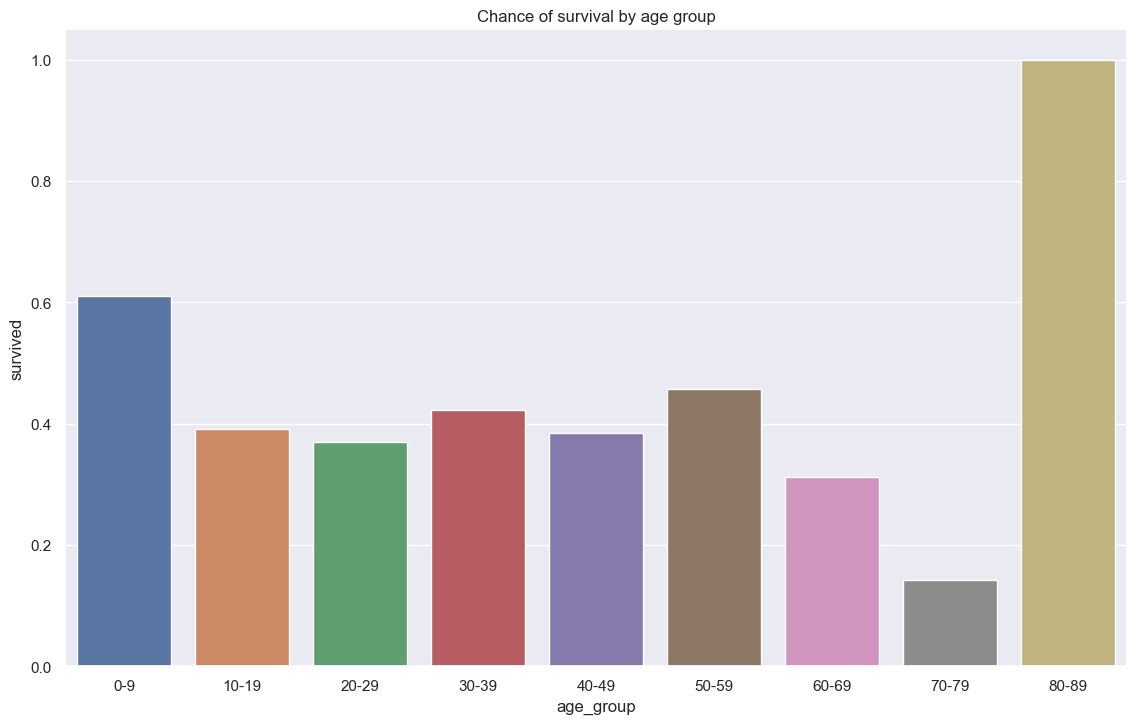

In [218]:
sns.barplot(data = titanic_age_correlation_group_by_mean, y = "survived", x = "age_group").set(title = "Chance of survival by age group");

##### A graph showing the probability of surviving according to a certain age group.
##### We can spot some interesting details:
##### We can see almost no difference between the ages of 10 - 70 in the chance of survival, but also the chances of a small child to survive, grow significantly between the ages of 0-9, by almost 1.5 times.
##### The amount of people over the age of 70 is 8 and is negligable(can be seen in the following graph).

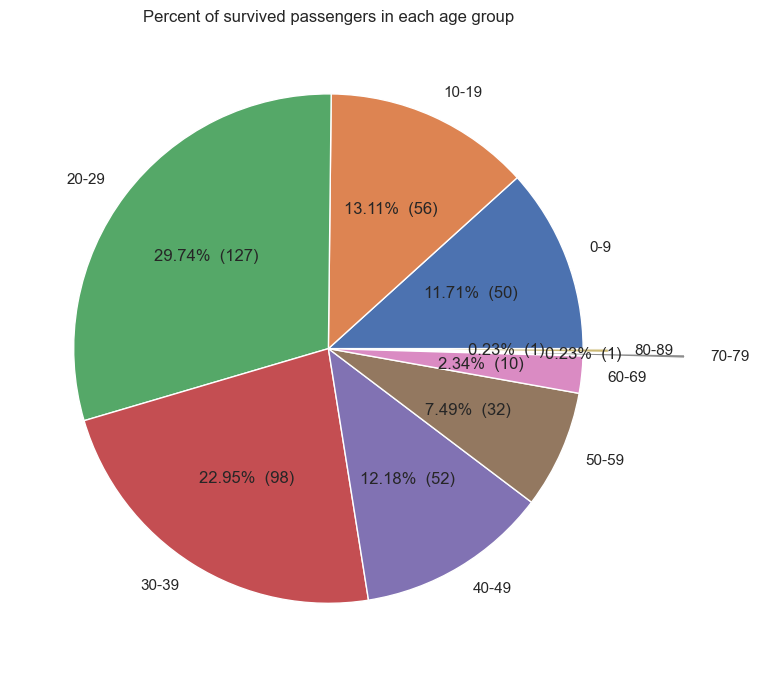

In [219]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(x = titanic_age_correlation_group_by_sum["survived"][0:9], labels = labels, explode = (0, 0, 0, 0, 0.0, 0.0, 0, 0.4, 0.1),
        autopct=make_autopct(titanic_age_correlation_group_by_sum["survived"][0:9]))
plt.title("Percent of survived passengers in each age group")
plt.show()

##### This graph proves us how significant was the young adult population, and also how strongly little children were prefered to be saved in relation to other age groups.

### Now we can look at another demographic aspect - Sex.

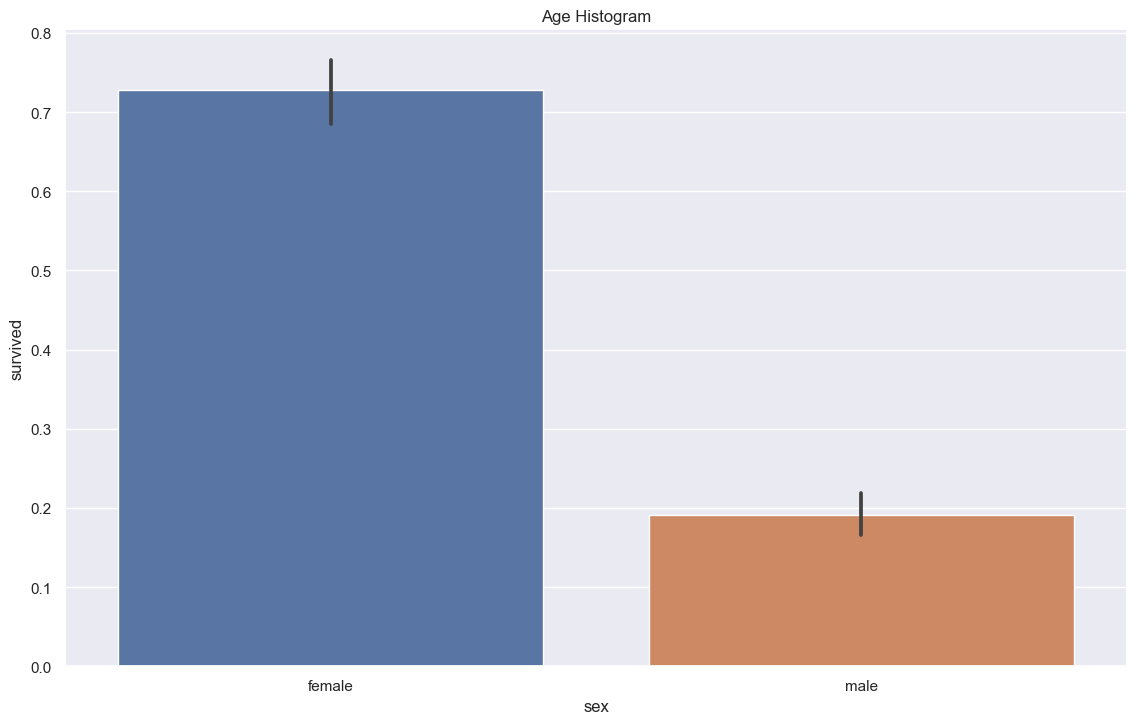

In [220]:
sns.barplot(data = titanic_full_data, x = "sex", y = "survived").set(title = "Age Histogram");

##### We can see here the outstanding correlation between male and female survival rate - Females have an almost 4 times better chance of being saved from the sinking of the Titanic.

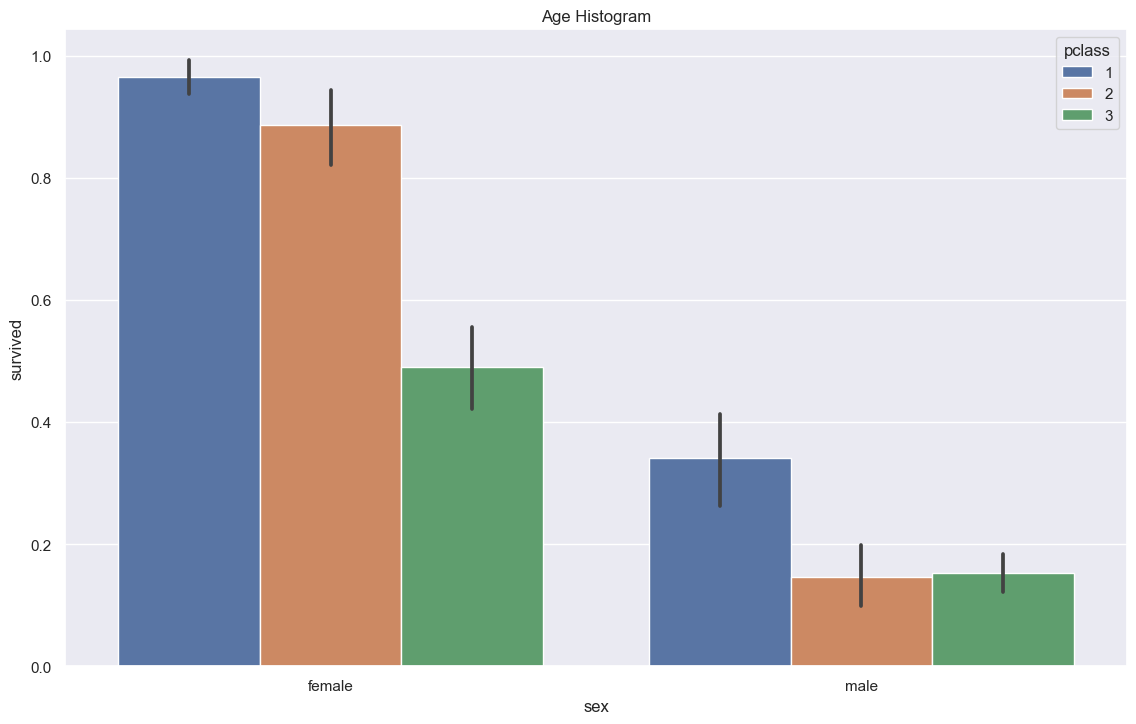

In [221]:
sns.barplot(data = titanic_full_data, x = "sex", y = "survived", hue="pclass").set(title = "Age Histogram");

##### Here we can again notice the difference between sexes, and interestingly prove that the famous saying "Women and children first", was indeed mostly true in the case of the Titanic.
##### In addition we notice the difference we saw earlier between the different passangers classes.


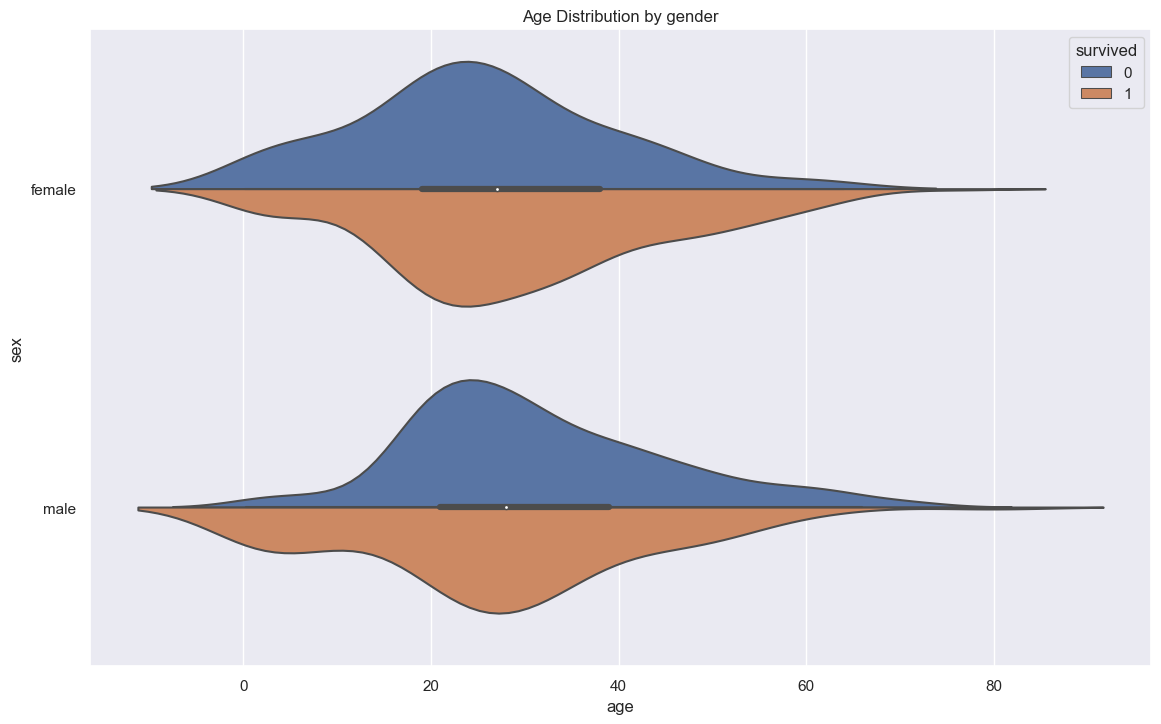

In [60]:
sns.violinplot(data = titanic_full_data, x="age", y = "sex", hue = "survived", split=True).set(title="Age Distribution by gender");

### Thus, let's examine them now.

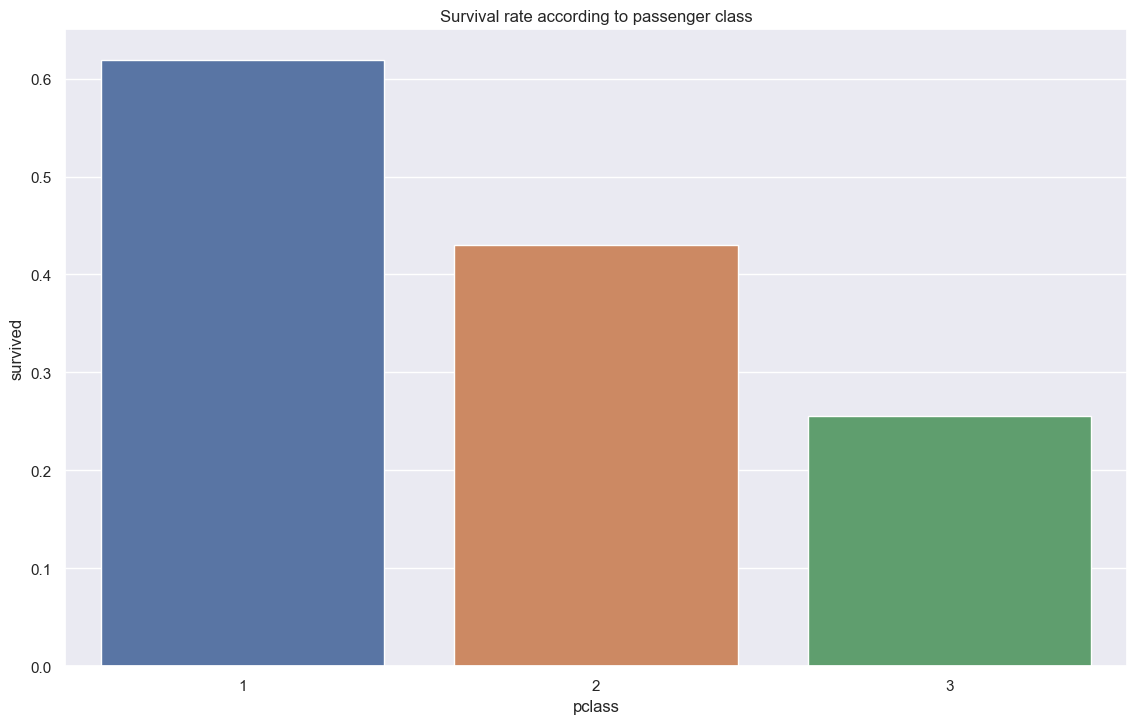

In [222]:
titanic_pclass_correlation_group_by_mean = titanic_age_correlation_data.groupby(["pclass"]).mean()
titanic_pclass_correlation_group_by_mean = titanic_pclass_correlation_group_by_mean.reset_index()
sns.barplot(data = titanic_pclass_correlation_group_by_mean, y = "survived", x = "pclass").set(title = "Survival rate according to passenger class");

##### Here we can clearly see that the lower the passenger's class, the higher his chances of survival, something we assumed was correct according to the previous graphs but now has been proven again.
##### We can see that even though the first class has little children, it still has higher survival chances by far.

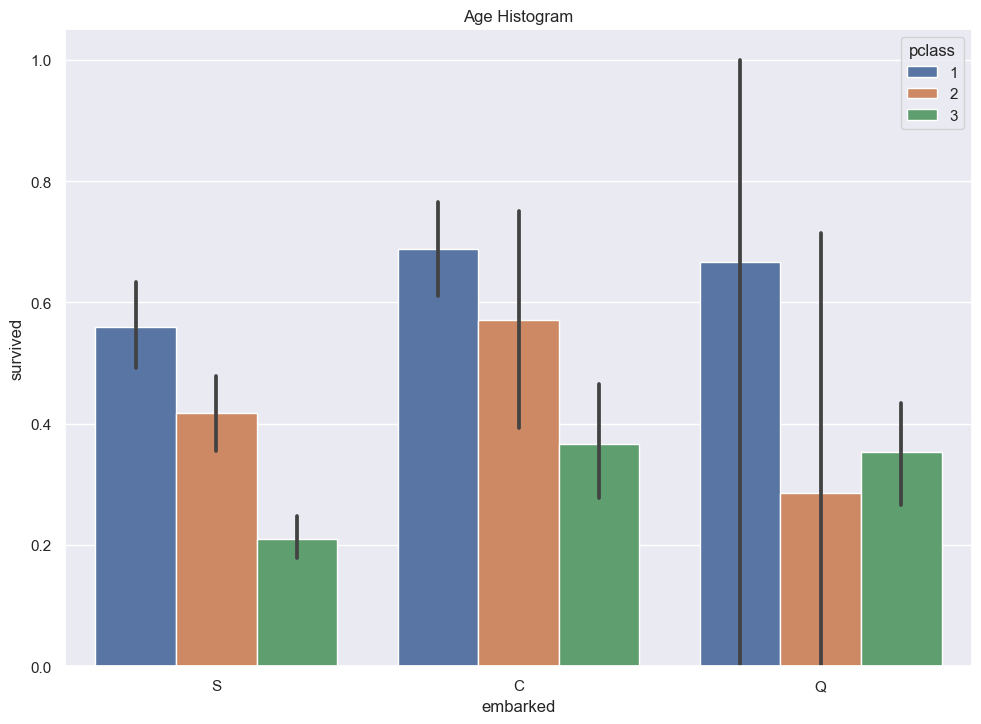

In [223]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = titanic_full_data, x = "embarked", y = "survived", hue="pclass").set(title = "Age Histogram");

##### We can also see that the embarking point has a certain meaning (for example, people from southampton had a lower survival rate than people from Cherbourg or Queenstown), but it can most likely be contributed to the passenger class, which can be explained by Southampton being poorer.

### In conclusion, we can conclude that the main aspects that determine whether a person can survive or not, are his passenger class, sex, and age if the person is a child.